<a href="https://colab.research.google.com/github/bjornoshake/bgp-attack-detection/blob/main/BGP_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 !apt 

First let's start with the dataset.
This dataset can be found one the RIPE databse for datasets. 
It can be found there : 
https://www.ripe.net/analyse/internet-measurements/routing-information-service-ris/ris-raw-data

We can then see the total dataset, from 1999 to nowadays, from collectors at RIPE NCC, Amsteram : 

In [ ]:
! mkdir dataset

In [ ]:
#Downloading an update : 
! cd dataset
! wget https://data.ris.ripe.net/rrc00/2015.03/updates.20150331.0530.gz 


mkdir: cannot create directory ‘dataset’: File exists
--2021-12-10 12:57:26--  https://data.ris.ripe.net/rrc00/2015.03/updates.20150331.0530.gz
Resolving data.ris.ripe.net (data.ris.ripe.net)... 193.0.6.140, 2001:67c:2e8:22::c100:68c
Connecting to data.ris.ripe.net (data.ris.ripe.net)|193.0.6.140|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 625141 (610K) [application/x-gzip]
Saving to: ‘updates.20150331.0530.gz.2’

updates.20150331.05 100%[===================>] 610.49K   731KB/s    in 0.8s    

2021-12-10 12:57:28 (731 KB/s) - ‘updates.20150331.0530.gz.2’ saved [625141/625141]

--2021-12-10 12:57:28--  http://./dataset
Resolving . (.)... failed: No address associated with hostname.
wget: unable to resolve host address ‘.’
FINISHED --2021-12-10 12:57:28--
Total wall clock time: 1.5s
Downloaded: 1 files, 610K in 0.8s (731 KB/s)


However, it could be interesting to download a month of updates, or the latest one.

In [ ]:
import wget
import os
def getdataset(format, year, month):
  url='https://data.ris.ripe.net/ rrc00/'
  if format ="monthly":
    download_url = f"{url}/{year}.{month}/"
    download_command= f"wget -r --no-parent {download_url}"
    subprocess.run([downloadçcommand])
    
  


  elif format ="latest":
    wget.download(f"{url}/latest-update.gz", bar=bar_thermometer)
    wget.download(f"{url}/latest-bview.gz", bar=bar_thermometer)
    return "Latest Update successfully downloaded"
  else : 
    return "Wrong use, please use a correct type format : monthy, latest"


dataset(format, year, month)

However, we can taggle the problem only by taking the major bgp events that occured :
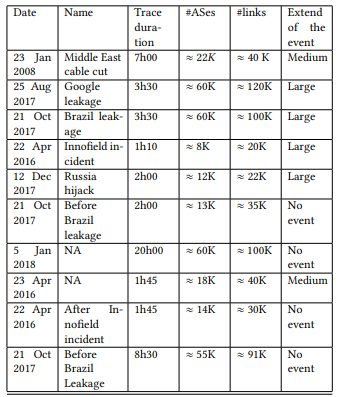

We will then focus on the longest and the event that had the biggest impact : Google Leakage 25/08/2017 - Brazil Leakage 21/10/2017 - Middle East Cable Cut 23/01/2008 - Russia Hijack 17/12/2017

In [ ]:
! wget -r --no-parent https://data.ris.ripe.net/rrc00/2008.01/updates.20080123.0000.gz


--2021-12-16 14:02:48--  https://data.ris.ripe.net/rrc00/2008.01/updates.20080123.0000.gz
Resolving data.ris.ripe.net (data.ris.ripe.net)... 193.0.6.140, 2001:67c:2e8:22::c100:68c
Connecting to data.ris.ripe.net (data.ris.ripe.net)|193.0.6.140|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64134 (63K) [application/x-gzip]
Saving to: ‘data.ris.ripe.net/rrc00/2008.01/updates.20080123.0000.gz’

data.ris.ripe.net/r 100%[===================>]  62.63K  --.-KB/s    in 0.09s   

2021-12-16 14:02:48 (690 KB/s) - ‘data.ris.ripe.net/rrc00/2008.01/updates.20080123.0000.gz’ saved [64134/64134]

FINISHED --2021-12-16 14:02:48--
Total wall clock time: 0.6s
Downloaded: 1 files, 63K in 0.09s (690 KB/s)


However, it is long, let's make a bash script -> github repo